In [27]:
import os, glob
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fmriprep_dir = os.path.join('Nifti', 'derivatives', 'fmriprep')

In [3]:
confound_path = os.path.join(fmriprep_dir, 'sub-{sub}', 'func',
                             'sub-{sub}_task-rest_desc-confounds_regressors.tsv')

In [4]:
files = glob.glob(confound_path.format(sub='*'))

In [5]:
exclude = []
include = []

for f in files:
    sub = os.path.basename(f).split('_')[0][4:]
    FD = pd.read_csv(f, sep='\t', usecols=['framewise_displacement'], squeeze=True)
    
    if FD.mean() > 0.2 or (FD > 0.25).sum() > 20:
        exclude.append(sub)
    else:
        include.append(sub)

# Cohort Split

In [74]:
cohort = pd.DataFrame()

In [75]:
cohort['id0'] = 'sub-' + pd.Series(include)

In [76]:
cohort['img'] = cohort['id0'].apply(
    lambda id0: os.path.join(id0, 'func', id0 + '_task-rest_space-PNC_desc-preproc_bold.nii.gz')
)

In [86]:
split = int(np.ceil(len(cohort) / 4))

for i in range(4):
    cohort[i*split : (i+1)*split].to_csv('work/cohort_{}.csv'.format(i), index=False)

# Demographic

In [59]:
age = pd.read_csv('phenotype/Interview_Dates_Update.csv')
phenotype = pd.read_csv('phenotype/Subject_Phenotypes.csv',
                        usecols=['SUBJID', 'Race', 'Sex'])

# drop proband+collateral interview duplicates
phenotype.drop_duplicates('SUBJID', inplace=True)

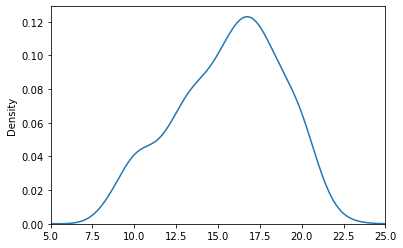

In [60]:
fig, ax = plt.subplots()

(age.loc[age.SUBJID.isin(pd.Series(include).astype(np.int64))]['ageAtScan'] / 12).plot.kde(ax=ax)

ax.set_xlim(5, 25)
ax.set_ylim(bottom=0)
plt.show()

In [61]:
p = phenotype.loc[phenotype.SUBJID.isin(pd.Series(include).astype(np.int64))]

In [62]:
len(p), sum(p['Sex'] == 'F') / len(p)

(551, 0.5553539019963702)

In [63]:
(sum(p['Race'].str.contains('EA', na=False)) / len(p),
 sum(p['Race'].str.contains('AA', na=False)) / len(p))

(0.49183303085299457, 0.5045372050816697)

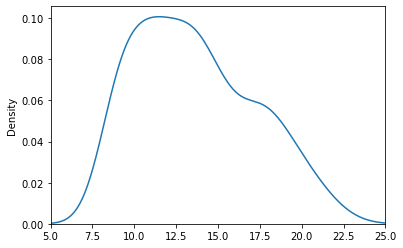

In [64]:
fig, ax = plt.subplots()

(age.loc[age.SUBJID.isin(pd.Series(exclude).astype(np.int64))]['ageAtScan'] / 12).plot.kde(ax=ax)

ax.set_xlim(5, 25)
ax.set_ylim(bottom=0)
plt.show()

In [65]:
p = phenotype.loc[phenotype.SUBJID.isin(pd.Series(exclude).astype(np.int64))]

In [66]:
len(p), sum(p['Sex'] == 'F') / len(p)

(283, 0.4911660777385159)

In [67]:
(sum(p['Race'].str.contains('EA', na=False)) / len(p),
 sum(p['Race'].str.contains('AA', na=False)) / len(p))

(0.5406360424028268, 0.43109540636042404)